# CO2 emissions of cars

There are a large variety of vehicles on the market, each with different sizes/engines/fuel types.  These vehicles all have different levels of fuel consumption and more importantly in terms of global warming, CO2 emissions.

It is possible to accurately predict CO2 emissions based on the vehicle characteristics, as will be shown in this project.

The vehicle data was downloaded from Kaggle (see below) and contains 7385 rows (each of a different vehicle) and 12 columns (each of a different vehicle property).  The original data was obtained by the Canadian government and thus contains vehicles available in Canada only.

https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading the data

### Read column/value definitions
These were provided with the dataset.  Will edit the dataframe for nice formatting and ease of access later.

In [2]:
def ExtractMeaning(s):
    try:
        return s.split('=')[1]
    except IndexError:
        return s.split('=')[0]

In [3]:
# Read description of data columns/values to refer back to later
desc = pd.read_csv('data/Data Description.csv')
desc.columns = ['Column title', 'Value meaning']

# Split 'Value meaning' in two
desc['Value'] = desc['Value meaning'].apply(lambda s: s.split('=')[0])
desc['Meaning'] = desc['Value meaning'].apply(ExtractMeaning)
desc.drop('Value meaning', axis=1, inplace=True)

# Set index
titles = pd.Series(['Model']*6 + ['Transmission']*6 + ['Fuel type']*5 + ['Fuel consumption', 'CO2 emissions'])
desc['Column title'] = titles
desc.set_index(['Column title','Value'], inplace=True)

In [4]:
desc # Column/value definitions

Meaning
Column title     Value                                                                                                
Model            4WD/4X4                                                                              Four-wheel drive
                 AWD                                                                                   All-wheel drive
                 FFV                                                                             Flexible-fuel vehicle
                 SWB                                                                                   Short wheelbase
                 LWB                                                                                    Long wheelbase
                 EWB                                                                                Extended wheelbase
Transmission     A                                                                                           automatic
                 AM                                                                                   automated manual
                 AS                                                                        automatic with select shift
                 AV                                                                              continuously variable
                 M                                                                                              manual
                 3 - 10                                                                                Number of gears
Fuel type        X                                                                                    regular gasoline
                 Z                                                                                    premium gasoline
                 D                                                                                              diesel
                 E                                                                                       ethanol (E85)
                 N                                                                                         natural gas
Fuel consumption City and highway fuel consumption ratings are s...  City and highway fuel consumption ratings are ...
CO2 emissions    the tailpipe emissions of carbon dioxide (in gr...  the tailpipe emissions of carbon dioxide (in g...

### Read data

In [5]:
emissions = pd.read_csv('data/CO2 Emissions_Canada.csv')

In [6]:
emissions.head(10)

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   
5  ACURA         RLX      MID-SIZE             3.5          6          AS6   
6  ACURA          TL      MID-SIZE             3.5          6          AS6   
7  ACURA      TL AWD      MID-SIZE             3.7          6          AS6   
8  ACURA      TL AWD      MID-SIZE             3.7          6           M6   
9  ACURA         TSX       COMPACT             2.4          4          AS5   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   
5         Z                              11.9   
6         Z                              11.8   
7         Z                              12.8   
8         Z                              13.4   
9         Z                              10.6   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   
5                              7.7                              10.0   
6                              8.1                              10.1   
7                              9.0                              11.1   
8                              9.5                              11.6   
9                              7.5                               9.2   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244  
5                           28                  230  
6                           28                  232  
7                           25                  255  
8                           24                  267  
9                           31                  212

## Exploratory data analysis

Aims:
- Understand general structure of the dataset. Are data types correct? Which columns are continuous/ordinate/discrete?
- Understand the quality of the dataset. Are there any duplicates/missing values/outliers that need to be dealt with?
- Understand the content of the dataset. How are the features/target variable distributed? Any correlations?
- Can any additional features be engineered to help with the regression later on?

### Structure

In [7]:
emissions.shape

(7385, 12)

In [8]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

No missing data and data types all make sense.

In [9]:
emissions.describe(exclude='number')

Make          Model Vehicle Class Transmission Fuel Type
count   7385           7385          7385         7385      7385
unique    42           2053            16           27         5
top     FORD  F-150 FFV 4X4   SUV - SMALL          AS6         X
freq     628             32          1217         1324      3637

Most common make is Ford, with the most common car being the F-150 (image downloaded from www.auto-data.net):

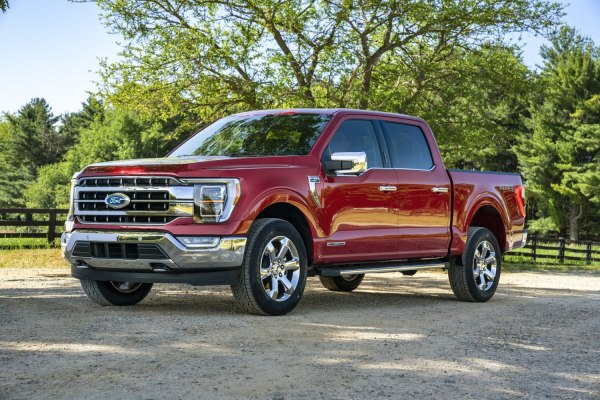

Most common fuel type is standard gasoline and most common transmission is AS (automatic select shift which with a bit of research, appear to be common in Fords).

In [10]:
emissions.describe()

Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
count                  7385.000000          7385.000000  
mean                     27.481652           250.584699  
std                       7.231879            58.512679  
min                      11.000000            96.000000  
25%                      22.000000           208.000000  
50%                      27.000000           246.000000  
75%                      32.000000           288.000000  
max                      69.000000           522.000000

No obvious outliers from max/min/quartiles - will investigate further later.

Means are approximately equal to medians in each case - suggests normal distributions.

<AxesSubplot:title={'center':'Unique values per feature'}>

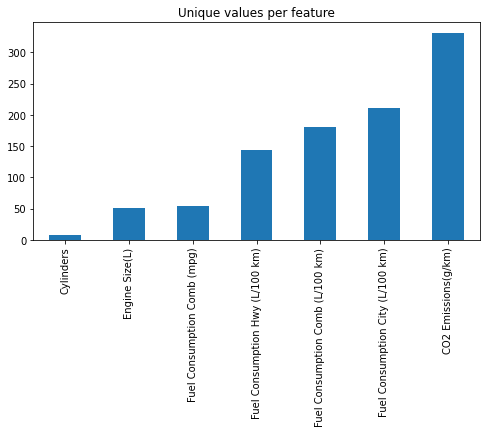

In [11]:
# Find number of unique values per numerical category to get idea of which are discrete/ordinal/continuous
unique_vals = emissions.select_dtypes(include="number").nunique().sort_values()
unique_vals.plot.bar(figsize=(8, 4), title="Unique values per feature")

Number of unique values in 'Fuel Consumption Comb (mpg)' much less than other fuel consumption categories as it appears the data has been rounded to the nearest integer whereas the others are stored as floats.

### Data quality

In [12]:
# Check for duplicated rows
emissions.duplicated().sum()

1103

In [13]:
# Show duplicated rows
emissions[emissions.duplicated() == True]

Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1075          6          AS6         Z                              12.1   
1076          6          AS6         Z                              11.9   
1081          4          AM6         Z                               9.7   
1082         12           A6         Z                              18.0   
1084          8          AM7         Z                              17.4   
...         ...          ...       ...                               ...   
7356          8          AS6         X                              17.7   
7365          4           M6         X                               9.8   
7366          4          AS8         X                               7.8   
7367          4           M6         X                               7.9   
7368          4          AM7         X                               9.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1075                              8.7                              10.6   
1076                              7.7                              10.0   
1081                              6.9                               8.4   
1082                             12.6                              15.6   
1084                             11.3                              14.7   
...                               ...                               ...   
7356                             13.6                              15.9   
7365                              7.3                               8.7   
7366                              5.9                               7.0   
7367                              5.9                               7.0   
7368                              7.2                               8.4   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1075                           27                  244  
1076                           28                  230  
1081                           34                  193  
1082                           18                  359  
1084                           19                  338  
...                           ...                  ...  
7356                           18                  371  
7365                           32                  203  
7366                           40                  162  
7367                           40                  163  
7368                           34                  196  

[1103 rows x 12 columns]

It is unclear from the original data source/collection method why duplicated rows would be present so remove them.

In [14]:
emissions.drop_duplicates(inplace=True)

In [15]:
emissions.shape

(6282, 12)

N.B. Already concluded at the start that there are no missing values so nothing needs doing w.r.t. that.

It seemed as though there were no major outliers earlier but investigate further to make sure.

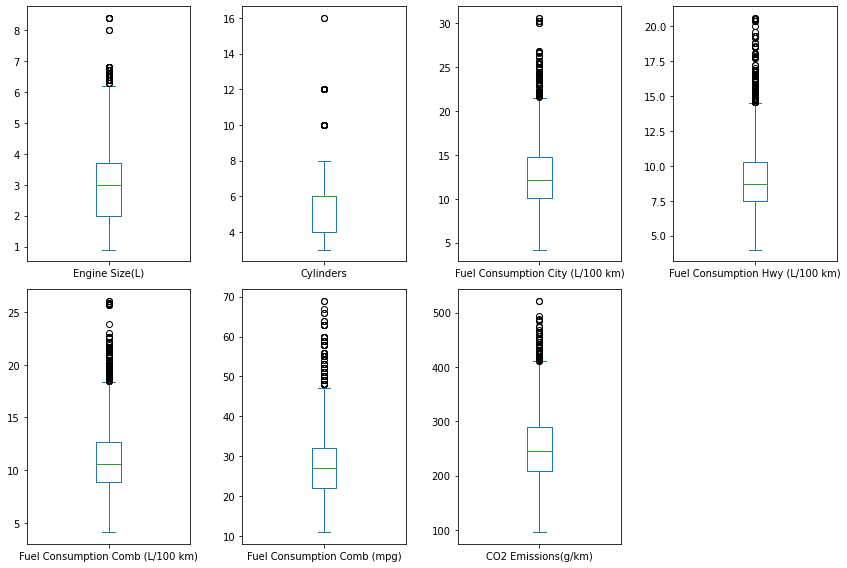

In [16]:
emissions.plot(kind='box', subplots=True, figsize=(12,8), layout=(2,4))
plt.tight_layout()

Definitely appear to be some outliers present - are they recording errors or actual outliers?

In [17]:
# Are the cars with large numbers of cylinders incorrectly recorded/outliers?
emissions[emissions['Cylinders']>8]

Make                 Model             Vehicle Class  \
13    ASTON MARTIN                   DB9               MINICOMPACT   
14    ASTON MARTIN                RAPIDE                SUBCOMPACT   
19    ASTON MARTIN              VANQUISH               MINICOMPACT   
36            AUDI                   A8L                 FULL-SIZE   
47            AUDI                    R8                TWO-SEATER   
...            ...                   ...                       ...   
7286   ROLLS-ROYCE  Cullinan Black Badge  STATION WAGON - MID-SIZE   
7287   ROLLS-ROYCE                  Dawn                   COMPACT   
7288   ROLLS-ROYCE                 Ghost                 FULL-SIZE   
7289   ROLLS-ROYCE             Ghost EWB                 FULL-SIZE   
7292   ROLLS-ROYCE                Wraith                  MID-SIZE   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
13               5.9         12           A6         Z   
14               5.9         12           A6         Z   
19               5.9         12           A6         Z   
36               6.3         12          AS8         Z   
47               5.2         10           A7         Z   
...              ...        ...          ...       ...   
7286             6.7         12          AS8         Z   
7287             6.6         12          AS8         Z   
7288             6.6         12          AS8         Z   
7289             6.6         12          AS8         Z   
7292             6.6         12          AS8         Z   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)  \
13                                18.0                             12.6   
14                                18.0                             12.6   
19                                18.0                             12.6   
36                                18.7                             11.5   
47                                18.2                             10.6   
...                                ...                              ...   
7286                              20.1                             12.1   
7287                              20.4                             13.1   
7288                              20.4                             13.1   
7289                              20.4                             13.1   
7292                              19.6                             12.8   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)  \
13                                15.6                           18   
14                                15.6                           18   
19                                15.6                           18   
36                                15.5                           18   
47                                14.8                           19   
...                                ...                          ...   
7286                              16.5                           17   
7287                              17.1                           17   
7288                              17.1                           17   
7289                              17.1                           17   
7292                              16.5                           17   

      CO2 Emissions(g/km)  
13                    359  
14                    359  
19                    359  
36                    363  
47                    347  
...                   ...  
7286                  386  
7287                  400  
7288                  400  
7289                  400  
7292                  387  

[177 rows x 12 columns]

Cars do exist with a large number of cylinders (tend to be the more expensive/powerful ones, as seen above).

There are also quite a few of these cars in this dataset so should be able to predict them reasonably well. Hence, do not remove.

In [18]:
# What about fuel consumption?
emissions[emissions['Fuel Consumption Comb (mpg)']>50]

Make                Model             Vehicle Class  \
415         FORD        FUSION HYBRID                  MID-SIZE   
487        HONDA        ACCORD HYBRID                  MID-SIZE   
992       TOYOTA                PRIUS                  MID-SIZE   
993       TOYOTA              PRIUS c                   COMPACT   
994       TOYOTA              PRIUS v  STATION WAGON - MID-SIZE   
1047  VOLKSWAGEN   JETTA TURBO HYBRID                   COMPACT   
1498        FORD        FUSION HYBRID                  MID-SIZE   
1569       HONDA        ACCORD HYBRID                  MID-SIZE   
1574       HONDA         CIVIC HYBRID                   COMPACT   
2113      TOYOTA                PRIUS                  MID-SIZE   
2114      TOYOTA              PRIUS c                   COMPACT   
2171  VOLKSWAGEN         JETTA HYBRID                   COMPACT   
2443   CHEVROLET        MALIBU HYBRID                  MID-SIZE   
2624        FORD        FUSION HYBRID                  MID-SIZE   
3229      TOYOTA                PRIUS                  MID-SIZE   
3230      TOYOTA              PRIUS c                   COMPACT   
3278  VOLKSWAGEN         JETTA HYBRID                   COMPACT   
3531   CHEVROLET        MALIBU HYBRID                  MID-SIZE   
3789       HONDA        ACCORD HYBRID                  MID-SIZE   
3823     HYUNDAI                IONIQ                 FULL-SIZE   
3824     HYUNDAI           IONIQ BLUE                 FULL-SIZE   
3933         KIA                 NIRO     STATION WAGON - SMALL   
3934         KIA              NIRO FE     STATION WAGON - SMALL   
3935         KIA         NIRO TOURING     STATION WAGON - SMALL   
4297      TOYOTA                PRIUS                  MID-SIZE   
4298      TOYOTA              PRIUS c                   COMPACT   
4858       HONDA        ACCORD HYBRID                 FULL-SIZE   
4899     HYUNDAI                IONIQ                 FULL-SIZE   
5377      TOYOTA      CAMRY HYBRID LE                  MID-SIZE   
5378      TOYOTA  CAMRY HYBRID XLE/SE                  MID-SIZE   
5392      TOYOTA                PRIUS                  MID-SIZE   
5649   CHEVROLET        Malibu Hybrid                  MID-SIZE   
5887       HONDA        Accord Hybrid                 FULL-SIZE   
5911       HONDA           Insight EX                  MID-SIZE   
5912       HONDA      Insight Touring                  MID-SIZE   
5930     HYUNDAI                IONIQ                 FULL-SIZE   
5931     HYUNDAI           IONIQ Blue                 FULL-SIZE   
6025         KIA                 Niro     STATION WAGON - SMALL   
6026         KIA              Niro FE     STATION WAGON - SMALL   
6027         KIA         Niro Touring     STATION WAGON - SMALL   
6069       LEXUS              ES 300h                  MID-SIZE   
6428      TOYOTA      Camry Hybrid LE                  MID-SIZE   
6429      TOYOTA  Camry Hybrid XLE/SE                  MID-SIZE   
6442      TOYOTA                Prius                  MID-SIZE   
6443      TOYOTA            Prius AWD                  MID-SIZE   
6444      TOYOTA              Prius c                   COMPACT   
6933       HONDA   Insight EX/Touring                  MID-SIZE   
6949     HYUNDAI                IONIQ                 FULL-SIZE   
6961     HYUNDAI        Sonata Hybrid                 FULL-SIZE   
7086       LEXUS              ES 300h                  MID-SIZE   
7325      TOYOTA      Camry Hybrid LE                  MID-SIZE   
7326      TOYOTA  Camry Hybrid XLE/SE                  MID-SIZE   
7335      TOYOTA       Corolla Hybrid                   COMPACT   
7341      TOYOTA                Prius                  MID-SIZE   

      Engine Size(L)  Cylinders Transmission Fuel Type  \
415              2.0          4           AV         X   
487              2.0          4           AV         X   
992              1.8          4           AV         X   
993              1.5          4           AV         X   
994              1.8          4     

As with cylinders, the cars with large fuel consumption (mpg) do exist (tend to be hybrids/small cars) - there are fewer of them than in the cylinder case but still reasonable number so do not remove.

### Data content and feature engineering

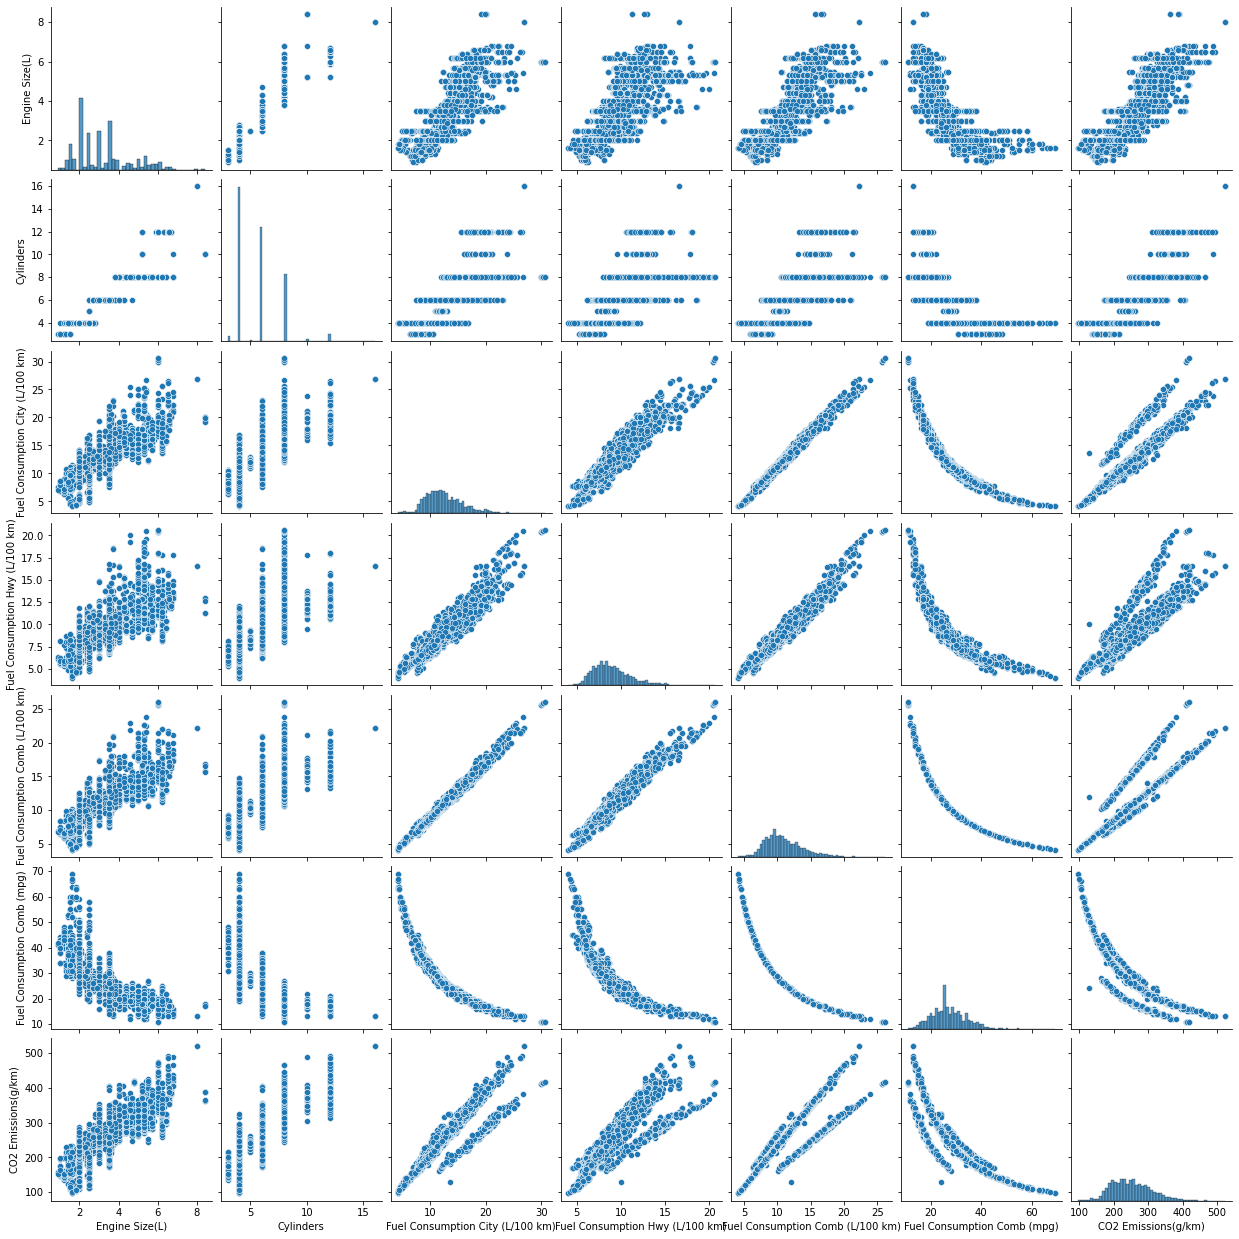

In [19]:
sns.pairplot(emissions)

Some points/features of interest in above pairplot:
- Histograms for continuous variables seem to be approximately gaussian (slight right skew in some cases but not major so do not transform).
- Approx. linear relationship between engine size, cylinders, fuel consumption (measured in L/100km) and CO2 emissions (as one would expect).
- Approx. 1/x relationship between fuel consumption (measured in mpg) and the other variables (again, as one would expect).
- CO2 emissions appear in at least three distinct groups when plotted against fuel consumption - investigated further below.



Seems as though there are several groups of data points in the CO2 emissions distributions.

After some investigations, narrowed these groups down to 'Fuel Type'.

In [20]:
desc.loc['Fuel type'] # Fuel type value meanings

Meaning
Value                   
X       regular gasoline
Z       premium gasoline
D                 diesel
E          ethanol (E85)
N            natural gas

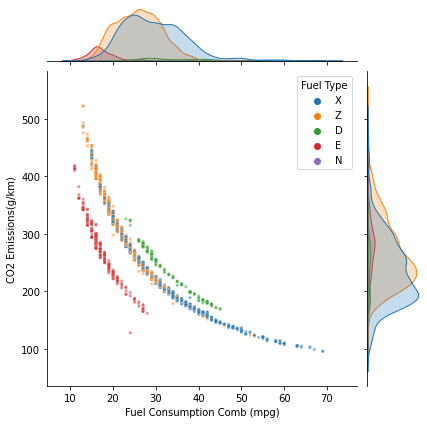

In [21]:
sns.jointplot(data=emissions, x='Fuel Consumption Comb (mpg)', y='CO2 Emissions(g/km)', hue='Fuel Type',
              hue_order='X Z D E N'.split(), alpha=0.5, s=10)

- E85 fuel has lower CO2 emissions for the same fuel consumption (mpg) compared to other fuels.
- Regular gasoline appears to have lower CO2 emissions and higher fuel consumption than premium gasoline (see table below).

In [22]:
emissions.groupby('Fuel Type').mean()

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
Fuel Type                                                                
D                2.532653   4.925170                          9.958503   
E                4.143939   6.563636                         19.491515   
N                3.600000   6.000000                         15.200000   
X                2.836788   5.040145                         11.462290   
Z                3.435118   6.179024                         13.190669   

           Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
Fuel Type                                                                      
D                                 7.263946                          8.749660   
E                                13.794545                         16.929091   
N                                 9.500000                         12.700000   
X                                 8.489404                         10.125502   
Z                                 9.241447                         11.413165   

           Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
Fuel Type                                                    
D                            33.319728           235.238095  
E                            17.257576           276.048485  
N                            22.000000           213.000000  
X                            29.659756           235.977953  
Z                            25.839060           265.731284

In [23]:
emissions.groupby('Fuel Type').std()

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
Fuel Type                                                                
D                0.534708   1.000606                          1.712918   
E                1.134688   1.432539                          3.403322   
N                     NaN        NaN                               NaN   
X                1.203808   1.404767                          2.996326   
Z                1.465256   2.113151                          3.077401   

           Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
Fuel Type                                                                      
D                                 1.422180                          1.557060   
E                                 2.616008                          3.016510   
N                                      NaN                               NaN   
X                                 1.973466                          2.505560   
Z                                 1.833252                          2.478764   

           Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
Fuel Type                                                    
D                             6.063575            41.911736  
E                             3.285367            48.742211  
N                                  NaN                  NaN  
X                             7.701735            58.303652  
Z                             5.353407            57.643169

Largest variation in combined fuel consumption (mpg) and CO2 emissions is in standard gasoline - potentially due to presence of hybrids?

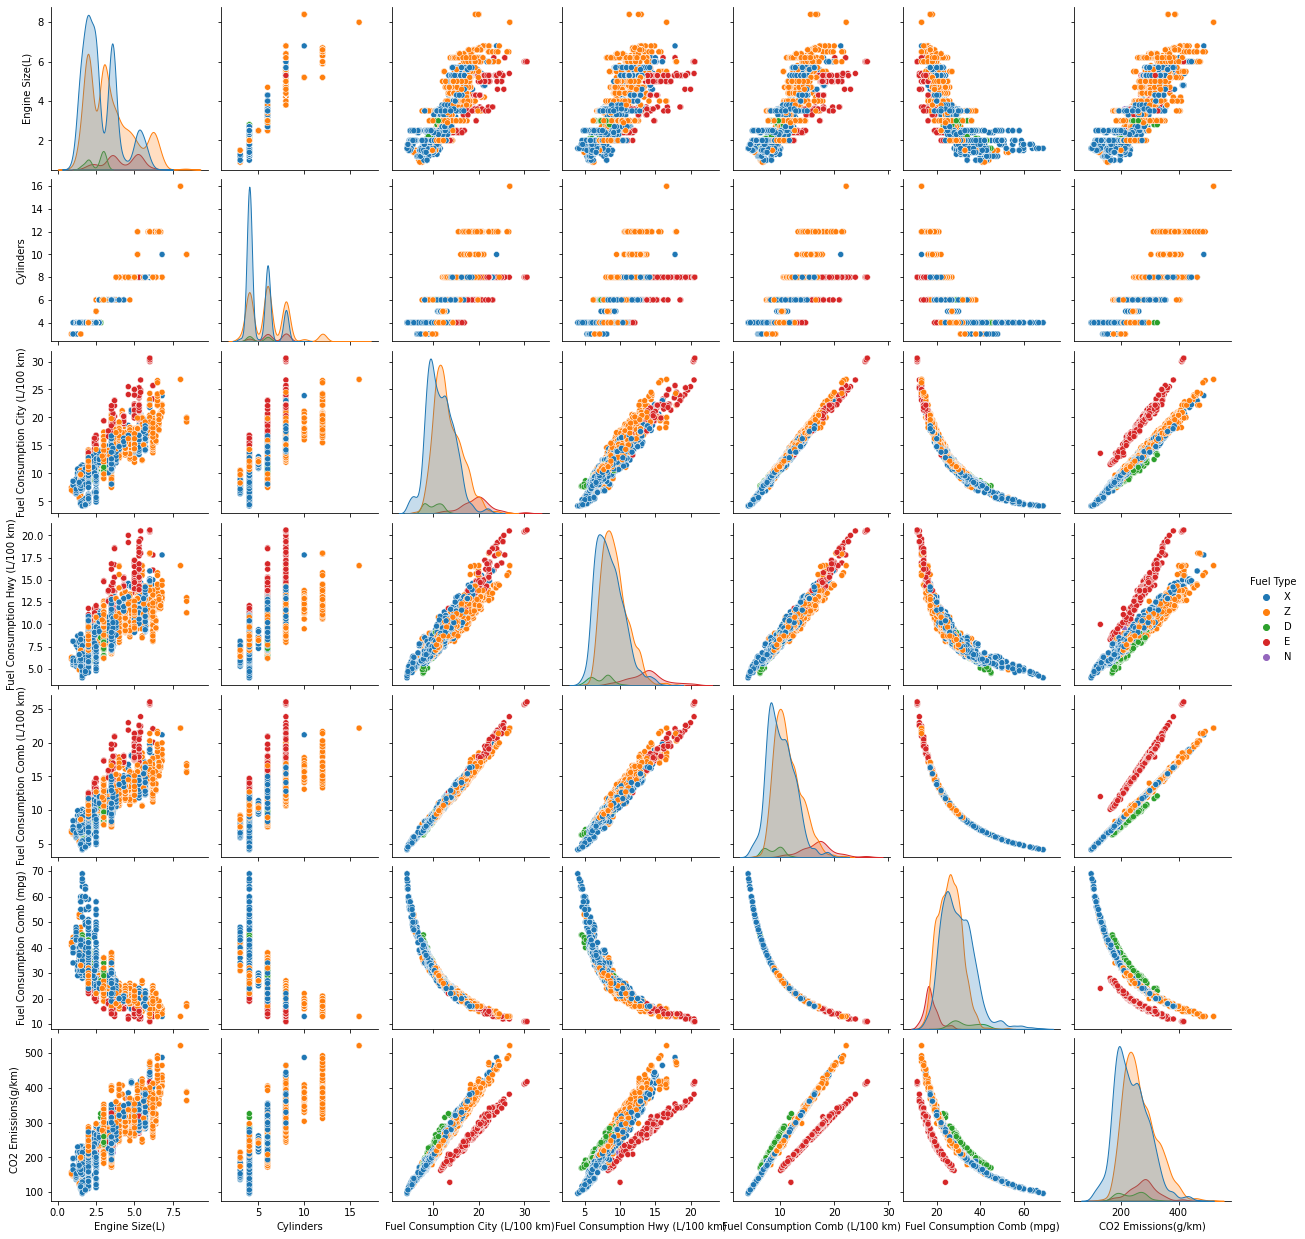

In [24]:
sns.pairplot(emissions, hue='Fuel Type', hue_order='X Z D E N'.split())

Cannot really see the natural gas cars in the plots above and the std=nan hints that there may be just one point, how many are there?

In [25]:
emissions[emissions['Fuel Type'] == 'N']

Make             Model Vehicle Class  Engine Size(L)  Cylinders  \
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE             3.6          6   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
2439          AS6         N                              15.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
2439                              9.5                              12.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
2439                           22                  213

Only one natural gas car in dataset so remove it.

In [26]:
emissions.drop(emissions[emissions['Fuel Type'] == 'N'].index, inplace=True)

In [27]:
emissions.shape

(6281, 12)

How do fuel consumptions compare between city and highway?

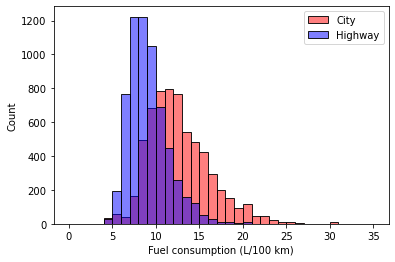

In [28]:
fig, ax = plt.subplots()
sns.histplot(data=emissions, x='Fuel Consumption City (L/100 km)', binrange=(0,35), binwidth=1, ax=ax, 
             color='red', alpha=0.5, label='City')
sns.histplot(data=emissions, x='Fuel Consumption Hwy (L/100 km)', binrange=(0,35), binwidth=1, ax=ax, 
             color='blue', alpha=0.5, label='Highway')
ax.set_xlabel('Fuel consumption (L/100 km)')
ax.legend()

What does the target variable (CO2 emissions) look like?

In [29]:
emissions['CO2 Emissions(g/km)'].describe()

count    6281.000000
mean      251.163827
std        59.293191
min        96.000000
25%       208.000000
50%       246.000000
75%       289.000000
max       522.000000
Name: CO2 Emissions(g/km), dtype: float64

<AxesSubplot:xlabel='CO2 Emissions(g/km)'>

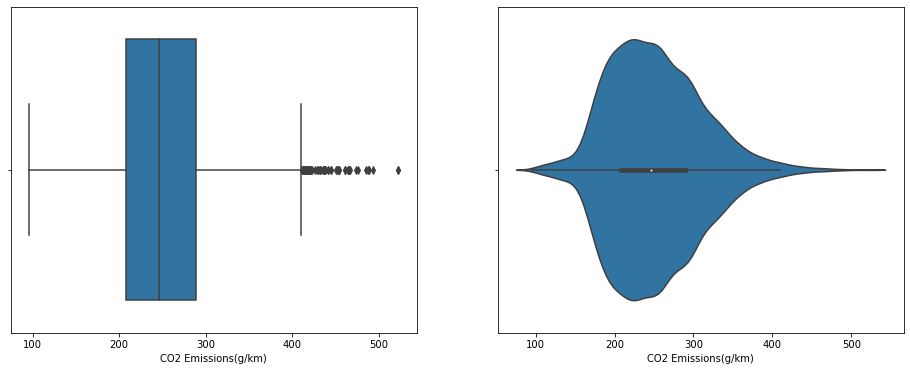

In [30]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(data=emissions, x='CO2 Emissions(g/km)', ax=ax[0])
sns.violinplot(data=emissions, x='CO2 Emissions(g/km)', ax=ax[1])

Medium level of skew in the CO2 emissions distribution.

More analysis of target variable done after feature engineering below.

As expected a few of the variables are very correlated:

<AxesSubplot:>

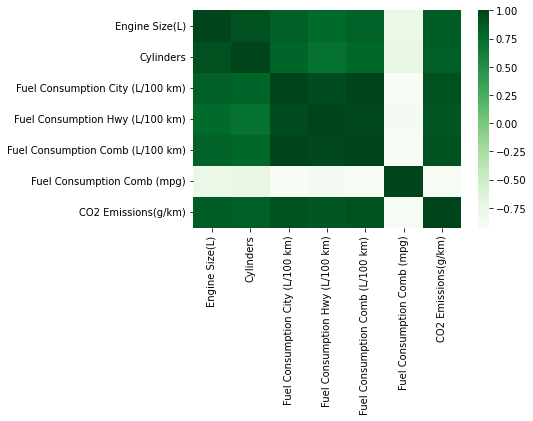

In [31]:
sns.heatmap(emissions.corr(), cmap='Greens')

There is high correlation between the two combined fuel consumption measurements (as expected with it being a simple unit conversion).

I will stick to UK fuel consumption measurement and neglect the City/Hwy distinction so drop unneeded columns.

In [32]:
emissions.drop(['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)'],
              axis=1, inplace=True)

In [33]:
emissions.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0         Z                           33                  196  
1         Z                           29                  221  
2         Z                           48                  136  
3         Z                           25                  255  
4         Z                           27                  244

<AxesSubplot:>

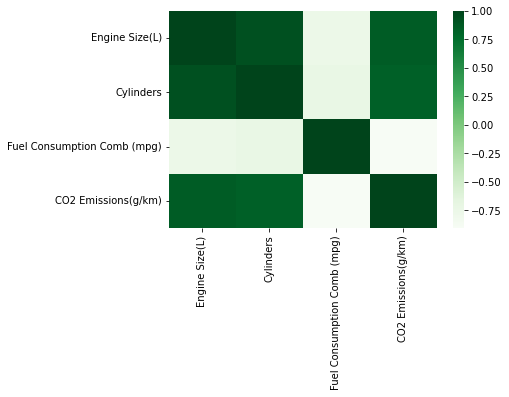

In [34]:
sns.heatmap(emissions.corr(), cmap='Greens')

What about the categorical columns?

In [35]:
emissions.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (mpg)',
       'CO2 Emissions(g/km)'],
      dtype='object')

In [36]:
emissions['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [37]:
desc.loc['Transmission'] # Definition of transmission values

Meaning
Value                                
A                           automatic
AM                   automated manual
AS        automatic with select shift
AV              continuously variable
M                              manual
3 - 10                Number of gears

Transmission in emissions dataset is in form 'Transmission+Number of gears'. Separate into two.

In [38]:
def ExtractGears(x):
    """
    Returns number of gears or zero if numbers of gears isn't present in transmission.
    """
    try:
        # If no number present, will throw ValueError
        return int(''.join(filter(str.isdigit, x)))
    except ValueError:
        return 0

In [39]:
emissions['Gears'] = emissions['Transmission'].apply(ExtractGears)

In [40]:
emissions.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  
0         Z                           33                  196      5  
1         Z                           29                  221      6  
2         Z                           48                  136      7  
3         Z                           25                  255      6  
4         Z                           27                  244      6

In [41]:
# Remove number from transmission column
emissions['Transmission'].replace('\d+', '', regex=True, inplace=True)

In [42]:
emissions['Gears'].value_counts()

6     2791
8     1513
7      880
9      329
5      276
0      241
10     188
4       63
Name: Gears, dtype: int64

In [43]:
emissions['Transmission'].value_counts()

AS    2721
A     1536
M     1019
AM     540
AV     465
Name: Transmission, dtype: int64

How do emissions vary with number of gears?

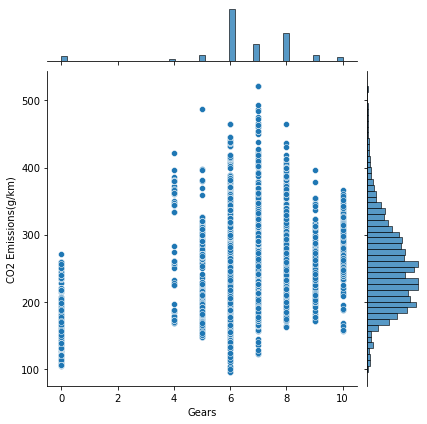

In [44]:
sns.jointplot(data=emissions, x='Gears', y='CO2 Emissions(g/km)')

No obvious trend here. What about transmission type?

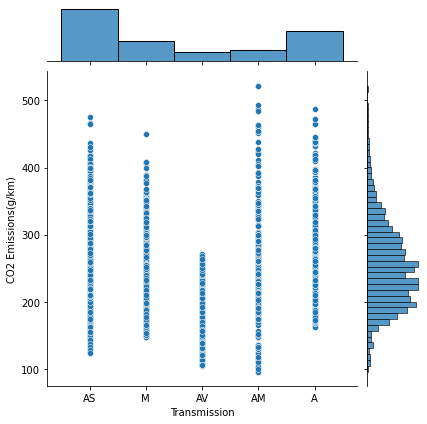

In [45]:
sns.jointplot(data=emissions, x='Transmission', y='CO2 Emissions(g/km)')

'AV' tend to have lower emissions than other types. Likely due to fact that a lot are hybrids e.g.

In [46]:
emissions[emissions['Transmission']=='AV']['Model']

2                                   ILX HYBRID
20                                          A4
259                                      SPARK
342                               C-MAX HYBRID
415                              FUSION HYBRID
                         ...                  
7335                            Corolla Hybrid
7339                     Highlander Hybrid AWD
7340    Highlander Hybrid AWD Limited/Platinum
7341                                     Prius
7347                           RAV4 Hybrid AWD
Name: Model, Length: 465, dtype: object

Introduce dummy variables for the transmission and fuel type.

In [47]:
emissions = pd.get_dummies(emissions,columns=['Transmission', 'Fuel Type'], prefix=['Transmission', 'Fuel'], drop_first=True)

In [48]:
emissions.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
0  ACURA         ILX       COMPACT             2.0          4   
1  ACURA         ILX       COMPACT             2.4          4   
2  ACURA  ILX HYBRID       COMPACT             1.5          4   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Gears  Transmission_AM  \
0                           33                  196      5                0   
1                           29                  221      6                0   
2                           48                  136      7                0   
3                           25                  255      6                0   
4                           27                  244      6                0   

   Transmission_AS  Transmission_AV  Transmission_M  Fuel_E  Fuel_X  Fuel_Z  
0                1                0               0       0       0       1  
1                0                0               1       0       0       1  
2                0                1               0       0       0       1  
3                1                0               0       0       0       1  
4                1                0               0       0       0       1

What about the class of the vehicle?

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Count'>

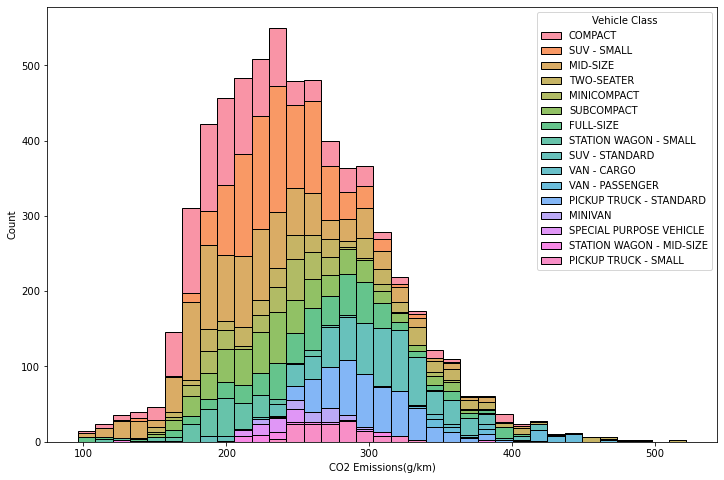

In [49]:
plt.figure(figsize=(12,8))
sns.histplot(data=emissions, x='CO2 Emissions(g/km)', bins=35, hue='Vehicle Class', multiple='stack')

In [50]:
emissions['Vehicle Class'].value_counts()

SUV - SMALL                 1006
MID-SIZE                     982
COMPACT                      903
SUV - STANDARD               613
SUBCOMPACT                   533
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      475
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        214
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: Vehicle Class, dtype: int64

Large number of types, some with very few counts. Group the vehicle classes together into 4 groups:

In [51]:
# Place vehicle classes into small, medium, large and extra large size classes
emissions['Vehicle size'] = emissions['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'small')
emissions['Vehicle size'] = emissions['Vehicle size'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'], 'medium')
emissions['Vehicle size'] = emissions['Vehicle size'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'], 'large')
emissions['Vehicle size'] = emissions['Vehicle size'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'extra large')
emissions.drop('Vehicle Class', axis=1, inplace=True)

In [52]:
emissions['Vehicle size'].value_counts()

medium         2130
small          1710
large          1680
extra large     761
Name: Vehicle size, dtype: int64

In [53]:
emissions.head()

Make       Model  Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  \
0  ACURA         ILX             2.0          4                           33   
1  ACURA         ILX             2.4          4                           29   
2  ACURA  ILX HYBRID             1.5          4                           48   
3  ACURA     MDX 4WD             3.5          6                           25   
4  ACURA     RDX AWD             3.5          6                           27   

   CO2 Emissions(g/km)  Gears  Transmission_AM  Transmission_AS  \
0                  196      5                0                1   
1                  221      6                0                0   
2                  136      7                0                0   
3                  255      6                0                1   
4                  244      6                0                1   

   Transmission_AV  Transmission_M  Fuel_E  Fuel_X  Fuel_Z Vehicle size  
0                0               0       0       0       1        small  
1                0               1       0       0       1        small  
2                1               0       0       0       1        small  
3                0               0       0       0       1        large  
4                0               0       0       0       1        large

What about the different car makes?

In [54]:
emissions['Make'].value_counts()

FORD             577
CHEVROLET        514
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           276
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            164
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: Make, dtype: int64

In [55]:
mean_CO2_by_make = emissions.groupby('Make').mean()['CO2 Emissions(g/km)']
std_CO2_by_make = emissions.groupby('Make').std()['CO2 Emissions(g/km)']

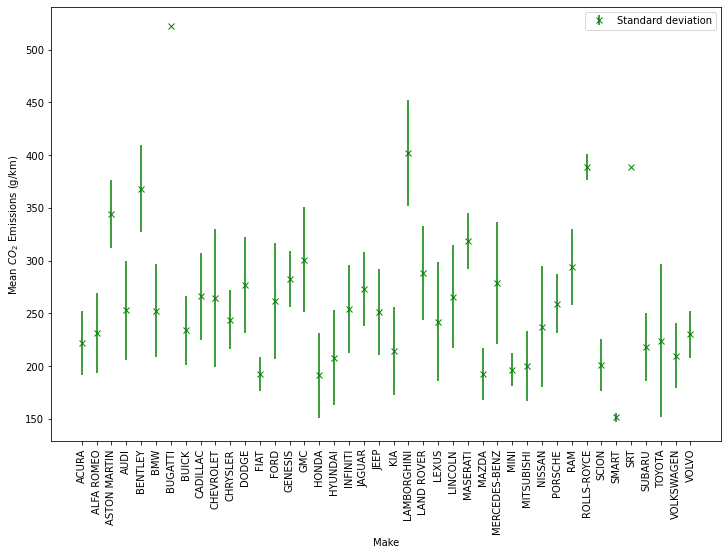

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
means = ax.errorbar(x=mean_CO2_by_make.index, y=mean_CO2_by_make, yerr=std_CO2_by_make, fmt='gx', label='Standard deviation')
temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook
ax.set_xlabel('Make')
ax.set_ylabel(r'Mean $CO_2$ Emissions (g/km)')
ax.legend()

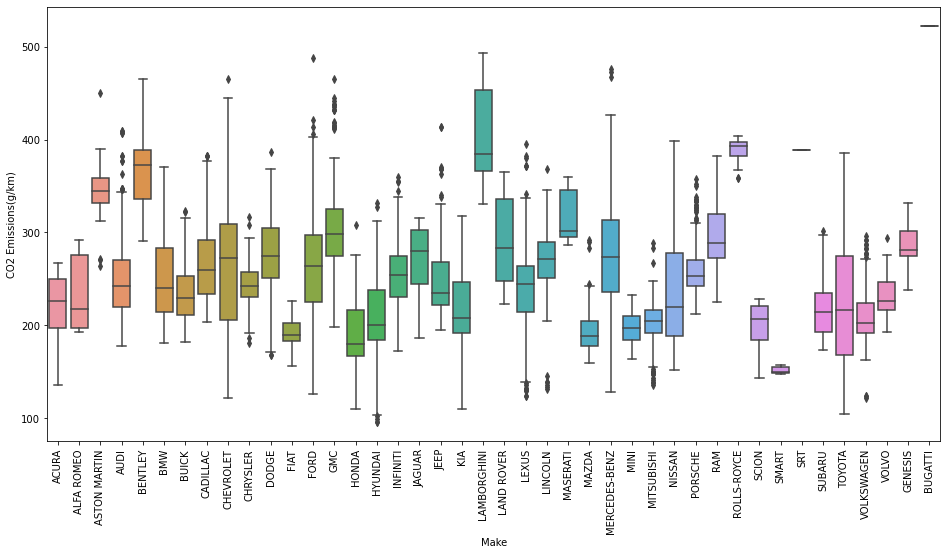

In [57]:
# Boxplot gives more information than swarmplot
# fig, ax = plt.subplots(figsize=(12,8))
# sns.swarmplot(data=emissions, x='Make', y='CO2 Emissions(g/km)', ax=ax, size=1)
# temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook
plt.figure(figsize=(16,8))
sns.boxplot(data=emissions, x='Make', y='CO2 Emissions(g/km)')
temp = plt.xticks(rotation=90) # Set to temp. variable to stop printout in jupyter notebook

Interesting but there are too many makes to produce dummy variables so instead, group into types of car.

In [58]:
# Group makes into classes that describe the general type of car produced by the manufacturer:
# general, sport, luxury, extra luxury
emissions['Vehicle type'] = emissions['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'SRT'],
                                                      'sport')
emissions['Vehicle type'] = emissions['Vehicle type'].replace(['ACURA', 'ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC',
                                                               'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JAGUAR', 'JEEP',
                                                               'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ', 'MINI', 'SMART',
                                                               'VOLVO'], 'luxury')
emissions['Vehicle type'] = emissions['Vehicle type'].replace(['BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'],
                                                              'extra luxury')
emissions['Vehicle type'] = emissions['Vehicle type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI',
                                                               'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU',
                                                               'TOYOTA', 'VOLKSWAGEN'], 'general')
emissions.drop(['Make', 'Model'], axis=1, inplace=True) # Also drop model as there are too many to be useful

In [59]:
emissions['Vehicle type'].value_counts()

luxury          2900
general         2775
sport            428
extra luxury     178
Name: Vehicle type, dtype: int64

In [60]:
emissions.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  \
0             2.0          4                           33   
1             2.4          4                           29   
2             1.5          4                           48   
3             3.5          6                           25   
4             3.5          6                           27   

   CO2 Emissions(g/km)  Gears  Transmission_AM  Transmission_AS  \
0                  196      5                0                1   
1                  221      6                0                0   
2                  136      7                0                0   
3                  255      6                0                1   
4                  244      6                0                1   

   Transmission_AV  Transmission_M  Fuel_E  Fuel_X  Fuel_Z Vehicle size  \
0                0               0       0       0       1        small   
1                0               1       0       0       1        small   
2                1               0       0       0       1        small   
3                0               0       0       0       1        large   
4                0               0       0       0       1        large   

  Vehicle type  
0       luxury  
1       luxury  
2       luxury  
3       luxury  
4       luxury

How do target variable distributions look as a function of the new variables?

<AxesSubplot:xlabel='Vehicle size', ylabel='CO2 Emissions(g/km)'>

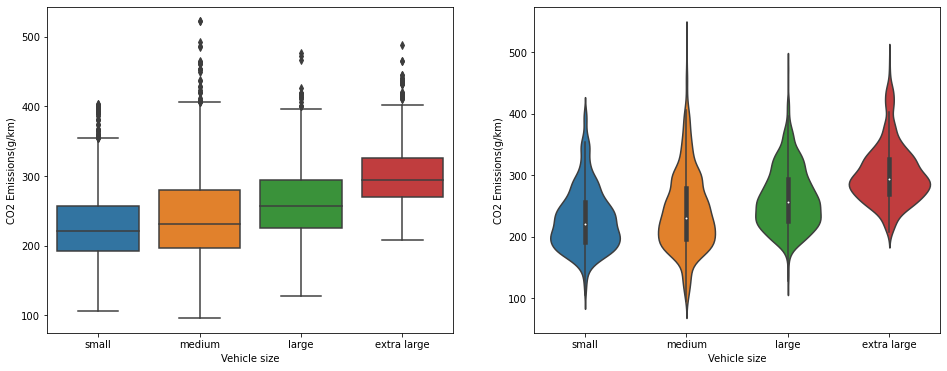

In [61]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
size_order = ['small', 'medium', 'large', 'extra large']
sns.boxplot(data=emissions, y='CO2 Emissions(g/km)', x='Vehicle size', ax=ax[0], order=size_order)
sns.violinplot(data=emissions, y='CO2 Emissions(g/km)', x='Vehicle size', ax=ax[1], order=size_order)

Emissions generally increase as the size of the vehicle increases. Makes sense as larger vehicles tend to have larger engines.

<AxesSubplot:xlabel='Vehicle type', ylabel='CO2 Emissions(g/km)'>

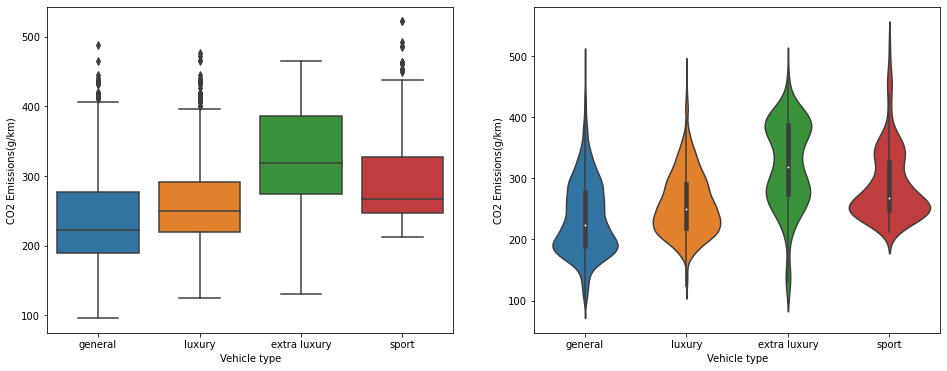

In [62]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
type_order = ['general', 'luxury', 'extra luxury', 'sport']
sns.boxplot(data=emissions, y='CO2 Emissions(g/km)', x='Vehicle type', ax=ax[0], order=type_order)
sns.violinplot(data=emissions, y='CO2 Emissions(g/km)', x='Vehicle type', ax=ax[1], order=type_order)

Generally, the more expensive the vehicle, the higher the emissions. Again, this makes sense as more expensive vehicles tend to be more powerful (with the exception of hybrids).

The 'extra luxury' category looks like it could be split in two as there are two distinct distributions present. However, leave as is for now.

Now need dummy variables for the 'Vehicle size' and 'Vehicle type' columns:

In [63]:
emissions = pd.get_dummies(emissions, columns=['Vehicle size', 'Vehicle type'], prefix=['size', 'type'], drop_first=True)

In [64]:
emissions.head()

Engine Size(L)  Cylinders  Fuel Consumption Comb (mpg)  \
0             2.0          4                           33   
1             2.4          4                           29   
2             1.5          4                           48   
3             3.5          6                           25   
4             3.5          6                           27   

   CO2 Emissions(g/km)  Gears  Transmission_AM  Transmission_AS  \
0                  196      5                0                1   
1                  221      6                0                0   
2                  136      7                0                0   
3                  255      6                0                1   
4                  244      6                0                1   

   Transmission_AV  Transmission_M  Fuel_E  Fuel_X  Fuel_Z  size_large  \
0                0               0       0       0       1           0   
1                0               1       0       0       1           0   
2                1               0       0       0       1           0   
3                0               0       0       0       1           1   
4                0               0       0       0       1           1   

   size_medium  size_small  type_general  type_luxury  type_sport  
0            0           1             0            1           0  
1            0           1             0            1           0  
2            0           1             0            1           0  
3            0           0             0            1           0  
4            0           0             0            1           0

## Regression

Aims:
- Can the CO2 emissions be precisely predicted based on the other features in the dataset?
- Is a linear regression model good enough or is another model needed?
- Can improvements be made on the best model using hyperparameter optimisation?

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [66]:
# Function that analyses prediction results for the models investigated later
def analyse_prediction_results(predictions, test):
    """
    Produce plots of prediction vs. true CO2 emissions and true-prediction.
    
    Prints and returns mae and rmse for comparison of different models later on.
    """
    # Plot prediction vs. true CO2 emissions
    plt.scatter(test, predictions, label='Prediction', s=2)
    plt.plot(range(50,500), range(50,500), 'r', label='y=x')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.legend()
    
    # Plot test - predictions
    sns.displot((test-predictions), bins=50)
    plt.xlabel('true - predicted (g/km)')
    
    # Metics
    mae = metrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test, predictions))
    print('MAE:', mae)
    print('RMSE:', rmse)
    return mae, rmse

In [67]:
# Split emissions dataset into training and testing samples
X = emissions.drop('CO2 Emissions(g/km)', axis=1)
y = emissions['CO2 Emissions(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Linear model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train,y_train)

LinearRegression()

In [71]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Engine Size(L)                  6.867189
Cylinders                       7.110608
Fuel Consumption Comb (mpg)    -5.357607
Gears                          -2.279674
Transmission_AM                 8.005364
Transmission_AS                 0.678668
Transmission_AV                -4.757464
Transmission_M                  1.757804
Fuel_E                        -72.468840
Fuel_X                        -24.330322
Fuel_Z                        -20.685834
size_large                     -8.905470
size_medium                   -16.133040
size_small                    -18.903318
type_general                  -12.704227
type_luxury                   -15.112564
type_sport                    -12.381961

In [72]:
linear_predictions = lm.predict(X_test)

MAE: 10.181657612099519
RMSE: 14.89790360024473


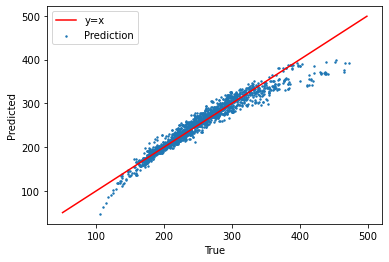

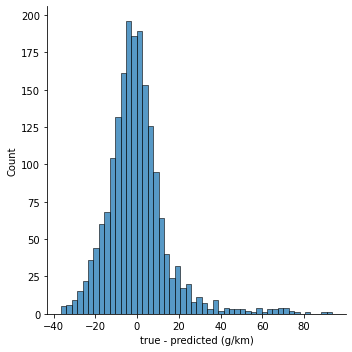

In [73]:
linear_mae, linear_rmse = analyse_prediction_results(linear_predictions, y_test)

Seem to do ok in the mid-range, less well at extremes. Expect this as there is much less data at the extremes.

RMSE of 14.9 is about a 6% relative error. This is ok but can probably do better.

Can this be improved with a different model?

### Random forest

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
rf_predictions = rf.predict(X_test)

MAE: 3.2402593153882844
RMSE: 4.672559738063014


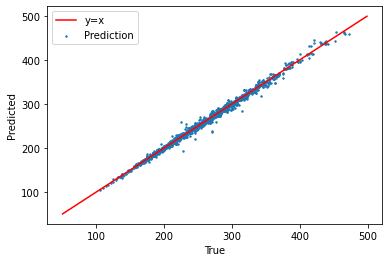

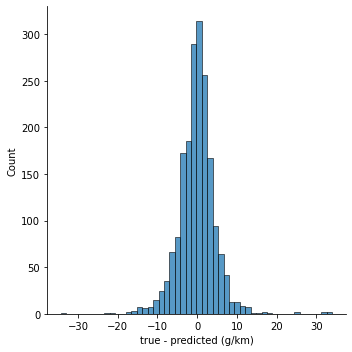

In [77]:
rf_mae, rf_rmse = analyse_prediction_results(rf_predictions, y_test)

Much better! MAE and RMSE ~1/3 smaller than before and values at extremes handled better.

Relative (RMSE) error of 1.9% much better.

### Optimised random forest

Can the RF be improved by optimising the hyperparameters?

In [78]:
import optuna

In [79]:
def objective(trial):
    # Specify parameters to optimise
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 10, 200)
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32) # Compare with 'log=True'?
    # Create regressor
    rf = RandomForestRegressor(max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    # Do training
    rf.fit(X_train, y_train)
    # Predict
    rf_predictions = rf.predict(X_test)
    # Return rmse
    rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_predictions))
    return rmse

In [80]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-05-23 10:05:02,300] A new study created in memory with name: no-name-72d6beab-04de-47c3-82fb-c44934c8c98f
C:\Users\emily\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-05-23 10:05:02,807] Trial 0 finished with value: 18.64595287948901 and parameters: {'rf_n_estimators': 112, 'rf_max_depth': 3}. Best is trial 0 with value: 18.64595287948901.
[I 2022-05-23 10:05:03,967] Trial 1 finished with value: 4.6724794609394324 and parameters: {'rf_n_estimators': 102, 'rf_max_depth': 27}. Best is trial 1 with value: 4.6724794609394324.
[I 2022-05-23 10:05:05,061] Trial 2 finished with value: 4.591439718194585 and parameters: {'rf_n_estimators': 112, 'rf_max_depth': 12}. Best is trial 2 with value: 4.591439718194585.
[I 2022-05-23 10:05:05,336] Trial 3 finished with value: 4.720789275411197 and parameters: {'rf_n_estimators': 23, 'rf_max_depth': 17}. Best is trial 2 with value: 4.591439718194585.
[I 2022-05-23 10:05:06,659] Trial 4 finished with value: 4.571160112814278 and parameters: {'rf_n_estimators': 134, 'rf_max_depth': 12}. Best is trial 4 with value: 4.571160112814278.
[I 2022-05-23 10:05:07,176] Trial 5 finished with value: 4.719026170383581 and p

[I 2022-05-23 10:05:52,097] Trial 42 finished with value: 4.564879528240564 and parameters: {'rf_n_estimators': 173, 'rf_max_depth': 11}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:05:54,039] Trial 43 finished with value: 4.598015368152409 and parameters: {'rf_n_estimators': 192, 'rf_max_depth': 13}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:05:54,925] Trial 44 finished with value: 4.919746205811139 and parameters: {'rf_n_estimators': 123, 'rf_max_depth': 8}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:05:56,539] Trial 45 finished with value: 4.609510582305746 and parameters: {'rf_n_estimators': 170, 'rf_max_depth': 11}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:05:58,166] Trial 46 finished with value: 4.6409059614310655 and parameters: {'rf_n_estimators': 152, 'rf_max_depth': 14}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:05:59,300] Trial 47 finished with value: 4.7022589341

[I 2022-05-23 10:06:53,707] Trial 85 finished with value: 4.612122686135213 and parameters: {'rf_n_estimators': 123, 'rf_max_depth': 10}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:06:54,926] Trial 86 finished with value: 4.89067719199809 and parameters: {'rf_n_estimators': 169, 'rf_max_depth': 8}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:06:56,412] Trial 87 finished with value: 4.627498985778174 and parameters: {'rf_n_estimators': 176, 'rf_max_depth': 10}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:06:57,680] Trial 88 finished with value: 4.58203581330395 and parameters: {'rf_n_estimators': 137, 'rf_max_depth': 11}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:06:58,652] Trial 89 finished with value: 4.641270534809404 and parameters: {'rf_n_estimators': 88, 'rf_max_depth': 15}. Best is trial 42 with value: 4.564879528240564.
[I 2022-05-23 10:06:59,834] Trial 90 finished with value: 4.63801835066430

In [81]:
history = optuna.visualization.plot_optimization_history(study) # produces plotly interactive figure
history.update_yaxes(title_text='RMSE', type="log")

Most choice of parameters result in a similar rmse, however a small improvement is possible.

In [82]:
optuna.visualization.plot_parallel_coordinate(study, params=['rf_n_estimators', 'rf_max_depth']) # uses plotly

The above plot shows that low max_depth values result in worse performance of the random forest (as expected) - this behaviour is independent of the n_estimators value used.

In [83]:
slice_plot = optuna.visualization.plot_slice(study, params=['rf_n_estimators', 'rf_max_depth']) # uses plotly
slice_plot.update_yaxes(title_text='RMSE')

Above plot confirms conclusion from previous plot -> max_depth is more important.

In [84]:
study.best_params

{'rf_n_estimators': 173, 'rf_max_depth': 11}

Best parameters shown above. Lots of combinations of these two parameters produce similar rmse however.

In [85]:
# Previous rmse from un-optimised random forest
rf_rmse

4.672559738063014

MAE: 3.232213681456877
RMSE: 4.598563009519423


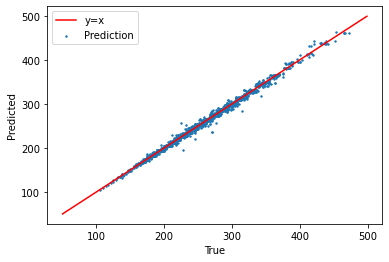

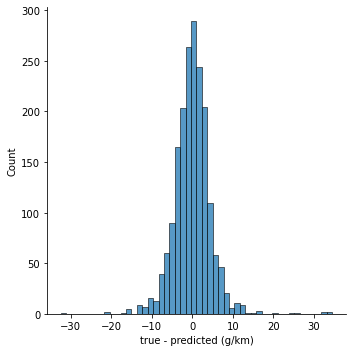

In [86]:
rf_opt = RandomForestRegressor(n_estimators=study.best_params['rf_n_estimators'],
                               max_depth=study.best_params['rf_max_depth'])
rf_opt.fit(X_train, y_train)
rf_opt_predictions = rf_opt.predict(X_test)
rf_opt_mae, rf_opt_rmse = analyse_prediction_results(rf_opt_predictions, y_test)

Slight improvement with optimised random forest but not too different!